# Churn Prediction in Telecom Industry: A Data-Driven Approach
#### Project Overview
##### This project aims to predict customer churn for a telecommunications company using historical customer data. The goal is to identify key factors that contribute to a customer leaving the service (churning) and build a predictive model to assist businesses in taking proactive measures to retain customers.

##### The dataset used in this analysis is sourced from Kaggle, consisting of key customer attributes such as tenure, monthly charges, total charges, and service usage details. By performing data exploration, visualization, and modeling techniques (including logistic regression and feature engineering), we can identify patterns in the data that help predict churn.

#### Key Insights
##### The distribution of churn across the dataset reveals that a significant percentage of customers do not churn, while a smaller portion accounts for the churned customers.
##### Initial analysis points to factors such as customer tenure, monthly charges, and service usage that correlate strongly with churn.
##### A machine learning model (Logistic Regression) was trained to predict churn, with a focus on improving model performance using techniques such as class weighting.
##### This project demonstrates the power of data science in transforming business operations and provides insights that can be used for customer retention strategies.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set the style for the plots
sns.set(style="whitegrid")

In [8]:
# Load the data into a pandas DataFrame
df = pd.read_csv(r'C:\Users\Mr. otegbola\Desktop\Potential Datasets for Projects\telecom_customer - Sheet1.csv')

In [9]:
# Check the first few rows of the dataset to ensure it's loaded properly
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [21]:
# Check for missing values in the dataset
missing_data = df.isnull().sum()

# Display the number of missing values for each column
print("Missing Values in Each Column:\n", missing_data)

# If no missing data exists, print a message to confirm
if missing_data.sum() == 0:
    print("\nThere are no missing values in the dataset.")
else:
    print("\nSome columns have missing values.")


Missing Values in Each Column:
 customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Some columns have missing values.


In [24]:
# Fill missing values in 'TotalCharges' with the median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

C:\Users\Mr. otegbola\AppData\Local\Temp\ipykernel_5988\302520657.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [23]:
# Verify that there are no missing values left
missing_data = df.isnull().sum()
print("Missing Values in Each Column After Imputation:\n", missing_data)

Missing Values in Each Column After Imputation:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [26]:
# Check the data types of each column
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [29]:
# Generate descriptive statistics for the dataset
descriptive_stats = df.describe()

In [30]:
# Display the summary statistics
print(descriptive_stats)

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2281.916928
std         0.368612    24.559481       30.090047   2265.270398
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    402.225000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000


### Data Preparation

#### Converting Categorical Variables to Numeric

In [31]:
# Convert 'gender' to numeric (0 for Female, 1 for Male)
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})

In [32]:
# Convert 'SeniorCitizen' to numeric (already binary)
df['SeniorCitizen'] = df['SeniorCitizen'].astype(int)

In [33]:
# One-hot encode categorical columns (e.g., 'Partner', 'Dependents', 'Contract', etc.)
df = pd.get_dummies(df, columns=['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                                 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                                 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                                 'StreamingMovies', 'Contract', 'PaperlessBilling', 
                                 'PaymentMethod'], drop_first=True)

In [35]:
# Check the updated DataFrame
df.head()

,customerID,gender,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,29.85,29.85,No,True,False,False,...,False,False,False,False,False,False,True,False,True,False
1,5575-GNVDE,1,0,34,56.95,1889.50,No,False,False,True,...,False,False,False,False,True,False,False,False,False,True
2,3668-QPYBK,1,0,2,53.85,108.15,Yes,False,False,True,...,False,False,False,False,False,False,True,False,False,True
3,7795-CFOCW,1,0,45,42.30,1840.75,No,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,9237-HQITU,0,0,2,70.70,151.65,Yes,False,False,True,...,False,False,False,False,False,False,True,False,True,False


In [36]:
# Check data types of all columns
print(df.dtypes)

customerID                                object
gender                                     int64
SeniorCitizen                              int32
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                     object
Partner_Yes                                 bool
Dependents_Yes                              bool
PhoneService_Yes                            bool
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                        bool
TechSupport_No inter

### Visualization: Distribution of Key Features

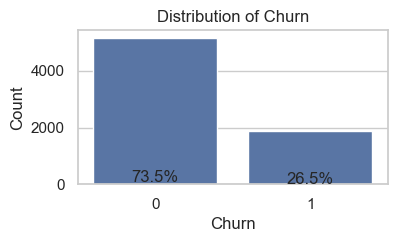

In [31]:
# Visualize the distribution of 'Churn' (Target Variable) with percentages
plt.figure(figsize=(4, 2))
sns.countplot(x='Churn', data=df)

# Calculate the percentage for each category
churn_counts = df['Churn'].value_counts(normalize=True) * 100

# Annotate the plot with percentage values
for i in range(len(churn_counts)):
    plt.text(i, churn_counts[i] + 1, f'{churn_counts[i]:.1f}%', ha='center', fontsize=12)

plt.title('Distribution of Churn')
plt.ylabel('Count')
plt.show()


##### Churn = 0 (No Churn): 73.5% of customers did not churn, indicating a relatively high level of retention in the customer base.
##### Churn = 1 (Churned): 26.5% of customers churned, which represents a significant portion of the customer base that may require further analysis to improve retention strategies.

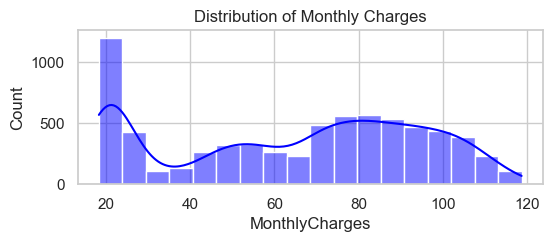

In [46]:
# Visualize the distribution of 'MonthlyCharges'
plt.figure(figsize=(6, 2))
sns.histplot(df['MonthlyCharges'], kde=True, color='blue')
plt.title('Distribution of Monthly Charges')
plt.show()

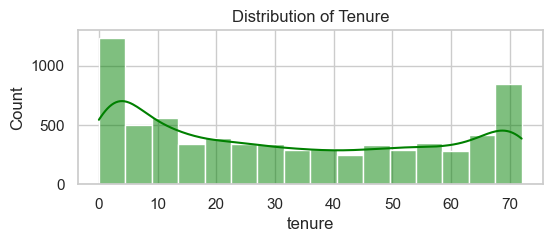

In [49]:
# Import necessary library
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap to visualize relationships between numerical features
plt.figure(figsize=(12, 8))  # Set the figure size
correlation_matrix = df.corr()  # Calculate the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)  # Create heatmap
plt.title('Correlation Heatmap of Features')  # Add a title
plt.show()  # Display the plot
# Visualize the distribution of 'Tenure'
plt.figure(figsize=(6, 2))
sns.histplot(df['tenure'], kde=True, color='green')
plt.title('Distribution of Tenure')
plt.show()

#### Visualization of Correlation Heatmap

In [15]:
# Select only numeric columns for correlation
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

In [16]:
# Check the selected columns
print("Numeric Columns:\n", numeric_columns.columns)

Numeric Columns:
 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


Numeric Columns:
 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


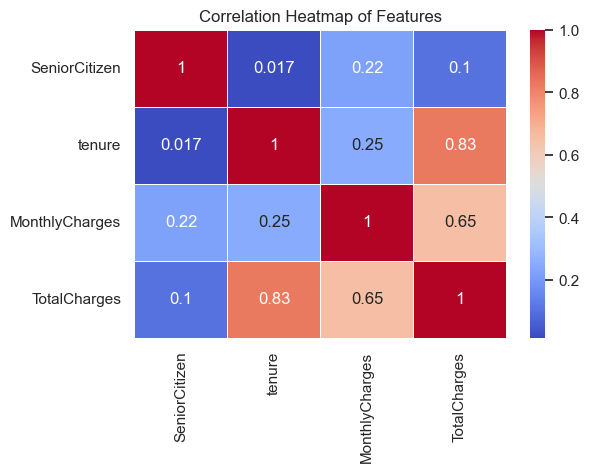

In [14]:
# Correlation heatmap
plt.figure(figsize=(6, 4))
correlation_matrix = numeric_columns.corr()  # Calculate the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

##### Key Insights: Tenure is highly correlated with total charges (0.83):
##### Customers who stay longer will naturally have higher total charges. This is an important feature to consider when analyzing or predicting churn.
##### Monthly charges moderately correlate with total charges (0.65):
##### Higher monthly charges contribute significantly to total charges.
##### Weak or negligible correlations for SeniorCitizen:
##### Being a senior citizen does not strongly influence tenure, monthly charges, or total charges.


 #### Correlation with Churn

In [17]:
# Convert 'Churn' to numerical (Yes = 1, No = 0)
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [18]:
# Calculate correlations with 'Churn'
churn_correlation = df[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].corr()

In [19]:
# Extract 'Churn' correlations
churn_correlation_with_target = churn_correlation['Churn'].drop('Churn')
print("Correlation with Churn:\n", churn_correlation_with_target)

Correlation with Churn:
 SeniorCitizen     0.150889
tenure           -0.352229
MonthlyCharges    0.193356
TotalCharges     -0.199484
Name: Churn, dtype: float64


##### Visualizing Correlations

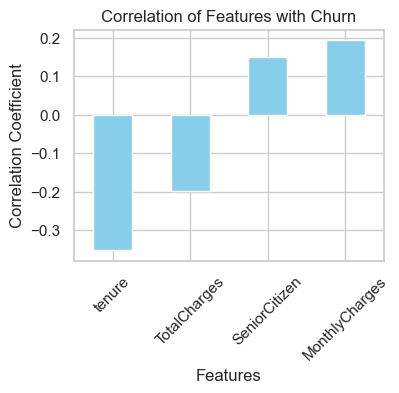

In [21]:
import matplotlib.pyplot as plt

# Plot correlation with 'Churn'
churn_correlation_with_target.sort_values().plot(kind='bar', figsize=(4, 3), color='skyblue')
plt.title('Correlation of Features with Churn')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.show()


#### Bar Plot for Correlations with Churn for more Intuitive Insight

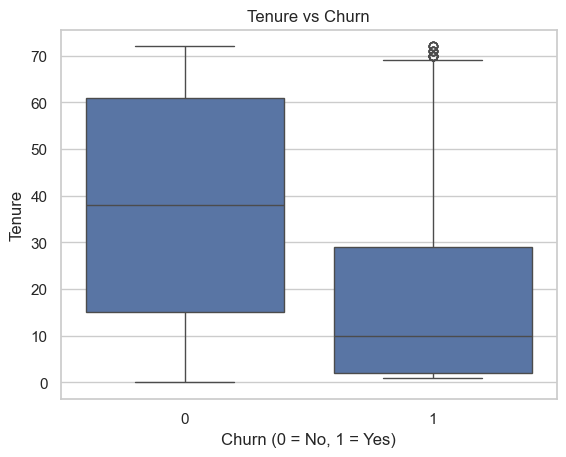

In [27]:
import seaborn as sns

# Box plot for tenure
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Tenure')
plt.show()


##### Shorter tenure = Higher churn: Customers with shorter tenures are more likely to churn, indicating that early-stage customers may not find enough value to stay.
##### Longer tenure = Lower churn: Customers with longer tenures tend to stay longer, suggesting that long-term customers are more satisfied and committed.

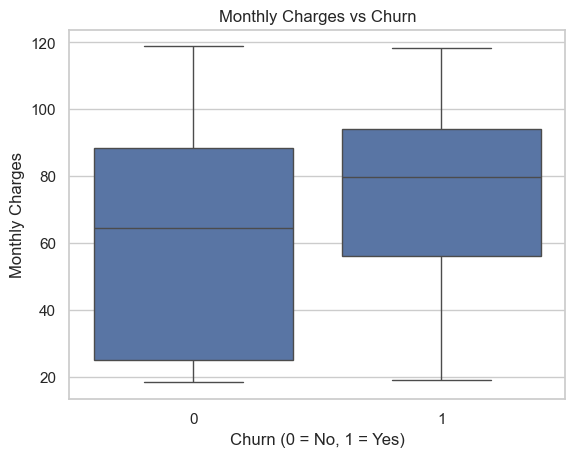

In [29]:
# Box plot for Monthly Charges
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Monthly Charges')
plt.show()


##### Higher monthly charges = Higher churn: Customers with higher monthly charges are more likely to churn, possibly due to dissatisfaction with the service or unaffordable pricing.
##### Lower monthly charges = Lower churn: Customers with lower monthly charges are less likely to churn, suggesting they derive more value from the service at a lower cost.

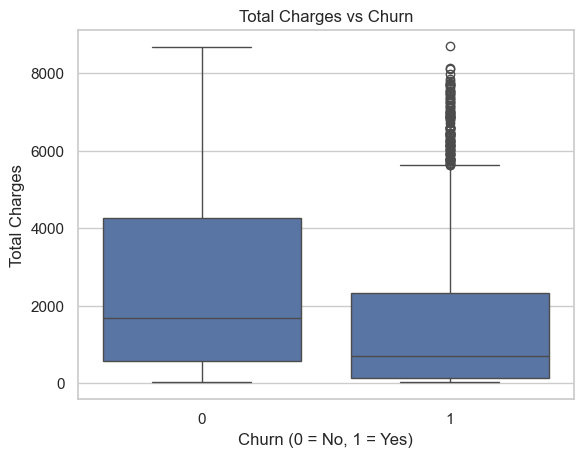

In [30]:
# Box plot for Total Charges
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Total Charges vs Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Total Charges')
plt.show()


##### Lower total charges = Higher churn: Customers who have accumulated fewer total charges (typically newer customers) are more likely to churn, possibly due to early dissatisfaction.
##### Higher total charges = Lower churn: Customers with higher total charges (long-term customers) are more likely to stay, showing that loyalty and accumulated value lead to better retention.

### Modeling Churn Prediction 

##### Preprocess the Data (Encode Categorical Variables)

In [32]:
# Encode categorical variables using pd.get_dummies (One-Hot Encoding)
df_encoded = pd.get_dummies(df, drop_first=True)

# Check the first few rows of the encoded dataframe
df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False


In [33]:
# Define the feature variables (X) and the target variable (y)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

In [34]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the splits
print(X_train.shape, X_test.shape)

(5634, 7072) (1409, 7072)


#### Impute Missing Values

In [39]:
from sklearn.impute import SimpleImputer

# Initialize the imputer (you can choose 'mean', 'median', or 'most_frequent')
imputer = SimpleImputer(strategy='mean')

# Impute the missing values in the features
X_imputed = imputer.fit_transform(X)

# Convert the imputed numpy array back to a DataFrame
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

# Split the data into training and testing sets after imputation
X_train_imputed, X_test_imputed, y_train_imputed, y_test_imputed = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


In [42]:
# Check for missing values in the target variable
missing_target = y.isnull().sum()
print(f"Missing values in target variable: {missing_target}")

# If there are any missing values in the target, drop those rows
df_clean_target = df_encoded.dropna(subset=['Churn'])

# Re-define features and target after cleaning the target variable
X_clean_target = df_clean_target.drop('Churn', axis=1)
y_clean_target = df_clean_target['Churn']

Missing values in target variable: 0


In [43]:
# Check for missing values after imputation
missing_data_imputed = pd.isnull(X_imputed).sum()
print("Missing values after imputation:\n", missing_data_imputed)


Missing values after imputation:
 SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
customerID_0003-MKNFE                    0
                                        ..
Contract_Two year                        0
PaperlessBilling_Yes                     0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
Length: 7072, dtype: int64


In [44]:
# Check for missing values in the target variable
missing_target = y.isnull().sum()
print(f"Missing values in target variable: {missing_target}")

# If there are any missing values in the target, drop those rows
df_clean_target = df_encoded.dropna(subset=['Churn'])

# Re-define features and target after cleaning the target variable
X_clean_target = df_clean_target.drop('Churn', axis=1)
y_clean_target = df_clean_target['Churn']


Missing values in target variable: 0


In [45]:
# Re-impute features if necessary
X_imputed_clean_target = imputer.fit_transform(X_clean_target)

# Convert back to DataFrame after imputation
X_imputed_clean_target = pd.DataFrame(X_imputed_clean_target, columns=X_clean_target.columns)


In [53]:
# Split the cleaned and imputed data into training and testing sets
X_train_imputed, X_test_imputed, y_train_imputed, y_test_imputed = train_test_split(X_imputed_clean_target, y_clean_target, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_imputed, y_train_imputed)

# Predict on the test set
y_pred = logreg.predict(X_test_imputed)

# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score
print(f"Accuracy: {accuracy_score(y_test_imputed, y_pred)}")
print("Classification Report:\n", classification_report(y_test_imputed, y_pred))


C:\Users\Mr. otegbola\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8190205819730305
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88      1036
           1       0.69      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409




##### Initial Model Report
##### Model Accuracy: The logistic regression model achieved an accuracy of 81.9%, indicating it correctly predicts churn or no churn in most cases.
##### Class-Specific Insights:
##### Non-Churners (Churn = 0): The model performs exceptionally well, with a high precision of 86%, recall of 91%, and F1-score of 88%.
##### Churners (Churn = 1): Performance is moderate, with a precision of 69%, recall of 58%, and F1-score of 63%.
##### Key Observations: The model shows a bias toward predicting non-churners more accurately, as evidenced by a significantly higher recall for Churn = 0 compared to Churn = 1.
##### Recommendation: To improve the model's performance on identifying churners, consider addressing class imbalance and experimenting with more complex algorithms or feature engineering.


#### Steps to Improve the Model

In [47]:
logreg = LogisticRegression(max_iter=2000)

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)
logreg.fit(X_train_scaled, y_train_imputed)

LogisticRegression(max_iter=2000)

##### Scale the data

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)
logreg.fit(X_train_scaled, y_train_imputed)

LogisticRegression(max_iter=2000)

In [51]:
logreg = LogisticRegression(max_iter=1000, class_weight='balanced')


In [52]:
# Train the Logistic Regression model with class weighting
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logreg.fit(X_train_imputed, y_train_imputed)

# Make predictions
y_pred = logreg.predict(X_test_imputed)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

# Accuracy
accuracy = accuracy_score(y_test_imputed, y_pred)
print("Balanced Logistic Regression Accuracy:", accuracy)

# Classification Report
print("\nClassification Report with Class Weighting:\n")
print(classification_report(y_test_imputed, y_pred))


C:\Users\Mr. otegbola\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Balanced Logistic Regression Accuracy: 0.7452093683463449

Classification Report with Class Weighting:

              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1036
           1       0.51      0.83      0.63       373

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409



##### Improved Model Report (With Balanced Class Weights)
##### Model Accuracy: The balanced logistic regression model achieved an accuracy of 74.5%, reflecting a more balanced performance between the two classes.
##### Class-Specific Insights:
##### Non-Churners (Churn = 0): Precision is 92%, recall is 71%, and F1-score is 80%, indicating solid performance but slightly reduced compared to the initial model.
##### Churners (Churn = 1): Performance improved significantly, with a precision of 51%, recall of 83%, and F1-score of 63%.
##### Key Observations: Adjusting class weights successfully improved the recall for churners, meaning the model now captures more customers likely to churn, even at the cost of overall accuracy.
##### Recommendation: This balanced approach is better suited for addressing churn, as identifying churners is often more critical for business decisions. Further improvement could involve advanced models like Random Forests or boosting algorithms.